## 계산 속도 증가 예시
- Numpy 그대로 활용
- Numba
- Cpython

### MCS 몬테카를로 예시
- 좌표(x, y) -1부터 1까지 난수 점 시뮬레이션 -> 반지름 길이1인 원, 변 길이2 정사각형
    - 난수 점 어디 속하는지 원 or 정사각형 -> 점 갯수의 비를 구한다 -> 원주율을 구할수 있다
* 난수 생성 및 속한 영역 계산 알고리즘 연산 속도 증가 예시임

(-1.1, 1.1)

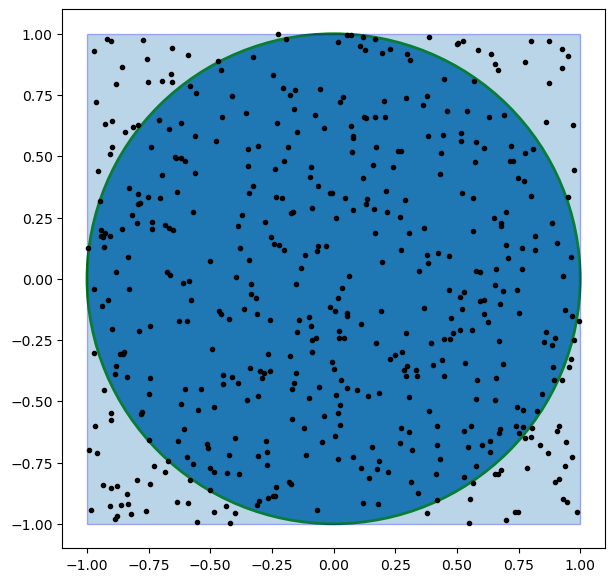

In [5]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

rn = [(random.random()*2 - 1, random.random()*2 - 1) for _ in range(500)]

rn = np.array(rn)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0, facecolor=None)
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:, 0], rn[:, 1], 'k.')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

In [6]:
# numpy를 통한 연산
n = int(1e7)
def mcs_pi_np(n):
    rn = np.random.random((n, 2))*2 - 1
    distance = np.sqrt((rn ** 2).sum(axis=1))
    frac = (distance <= 1.0).sum() / len(distance)
    pi_mcs = frac * 4
    return pi_mcs

%time mcs_pi_np(n)

CPU times: total: 641 ms
Wall time: 678 ms


3.1418532

In [7]:
# Numba 활용1
import numba

def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x**2 + y**2) ** 0.5 <= 1:
            circle += 1
    return 4 * circle / n

%time mcs_pi_py(n)

mcs_pi_nb = numba.jit(mcs_pi_py)
%time mcs_pi_nb(n)

CPU times: total: 7.91 s
Wall time: 7.99 s
CPU times: total: 219 ms
Wall time: 263 ms


3.1422624

In [8]:
# Numba 활용2
from numba import jit

@jit(nopython=True, cache=True)
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x**2 + y**2) ** 0.5 <= 1:
            circle += 1
    return 4 * circle / n

%time mcs_pi_py(n) 

CPU times: total: 141 ms
Wall time: 148 ms


3.1413552

In [2]:
import pandas as pd
temp = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
df = pd.DataFrame([temp])
df.head()

,a,b,c,d
0,1,2,3,4
